In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/new_y1.csv")
df.head()

,Date_,Month,Date,Year,Weekday,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
0,1/1/2021,1,1,2021,Friday,20,40,9,2,80,84,72,84,5,54,sixteentwenties
1,1/5/2021,1,5,2021,Tuesday,30,60,26,2,42,84,19,84,5,54,elevenfifteens
2,1/8/2021,1,8,2021,Friday,40,80,48,3,63,22,38,84,5,54,sixteentwenties
3,1/12/2021,1,12,2021,Tuesday,11,21,80,3,22,22,76,84,5,54,onefives
4,1/15/2021,1,15,2021,Friday,11,42,92,4,66,22,20,84,5,54,onefives


In [3]:
df.drop(labels=['Date_'],axis=1,inplace=True)

In [4]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["1st Num"] = encoding.fit_transform(df["1st Num"])

In [5]:
df["1st Num"].value_counts()

1st Num
1    140
3    100
0     59
2     42
5     25
6      5
4      1
Name: count, dtype: int64

In [6]:
# 0 means Friday; 1 means Tuesday
# 0 means 2022; 1 means 2023; 2 means 2024
# 0 means elevenfifteens, 1 means onefives, 2 means sixteentwenties, 3 means sixtens, 4 means thirtyonefives,
# 5 means twentyonefives, 6 means twentysixthirties

df.head()

,Month,Date,Year,Weekday,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
0,1,1,2021,0,20,40,9,2,80,84,72,84,5,54,2
1,1,5,2021,1,30,60,26,2,42,84,19,84,5,54,0
2,1,8,2021,0,40,80,48,3,63,22,38,84,5,54,2
3,1,12,2021,1,11,21,80,3,22,22,76,84,5,54,1
4,1,15,2021,0,11,42,92,4,66,22,20,84,5,54,1


In [40]:
X = df[['Date','Mars','Mercury','Jupiter','Venus','1st Num']]

<Axes: xlabel='1st Num', ylabel='count'>

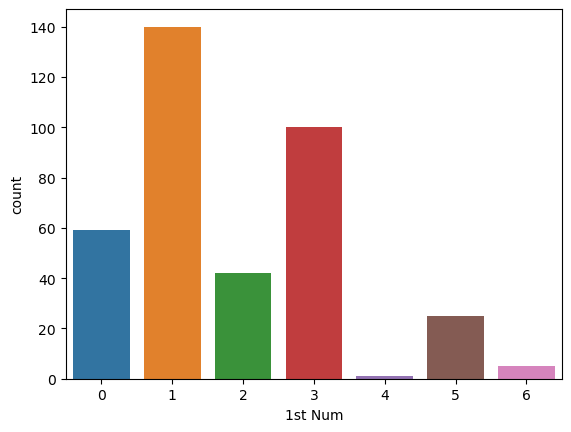

In [8]:
sns.countplot(data=X, x="1st Num")

<Axes: ylabel='count'>

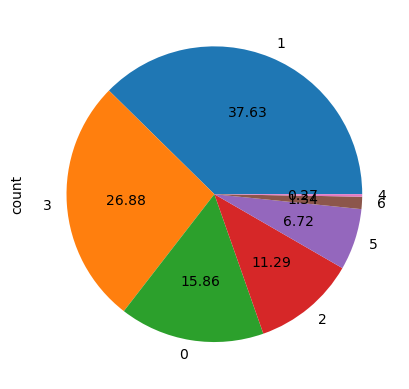

In [9]:
X["1st Num"].value_counts().plot(kind='pie', autopct = '%.2f')

(array([93., 80., 47., 37., 35., 14., 27., 23.,  7.,  9.]),
 array([  1. ,  11.7,  22.4,  33.1,  43.8,  54.5,  65.2,  75.9,  86.6,
         97.3, 108. ]),
 <BarContainer object of 10 artists>)

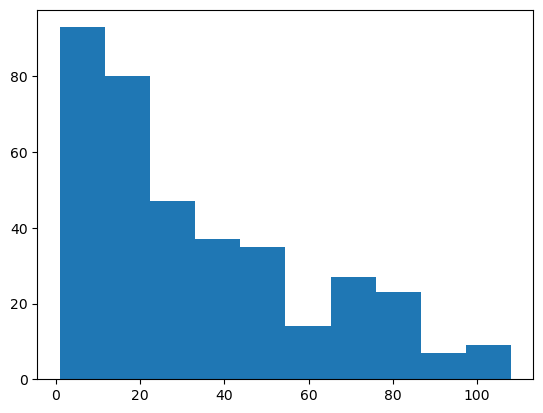

In [10]:
plt.hist(x=X['Mercury'])

<Axes: xlabel='Mercury', ylabel='Density'>

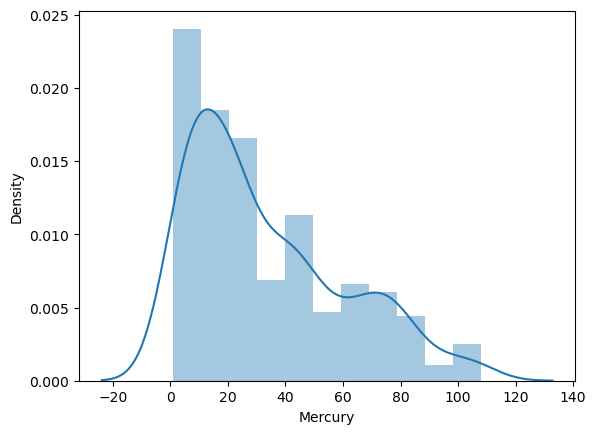

In [11]:
# Probability Density Function
# y-axis is the probability and x-axis is the value of the Mercury

sns.distplot(X['Mercury'])

<Axes: >

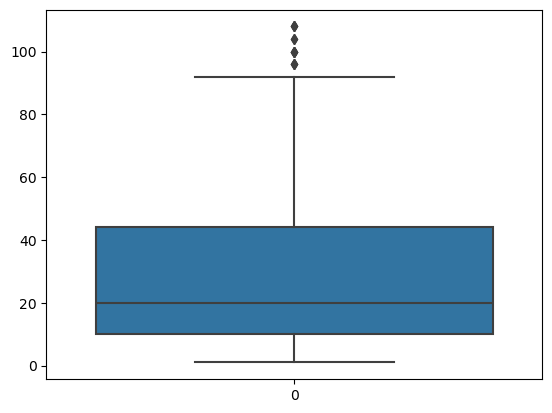

In [13]:
sns.boxplot(X['Mars'])

In [14]:
X['Mercury'].skew()

0.8607872051815212

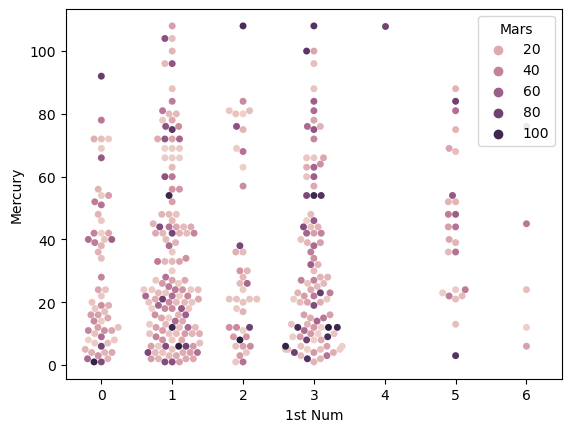

In [15]:
sns.swarmplot(x="1st Num",y="Mercury", data=X,hue="Mars")
plt.show()

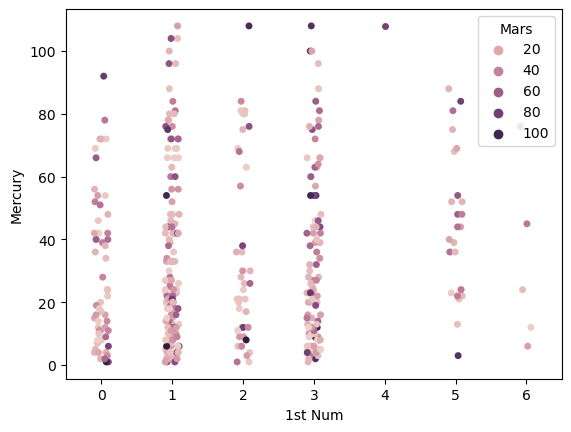

In [16]:
sns.stripplot(x="1st Num",y="Mercury", data=X,hue="Mars")
plt.show()

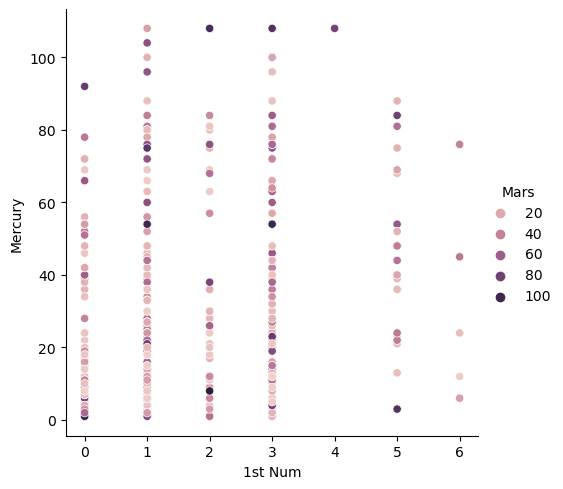

In [22]:
sns.relplot(x="1st Num",y="Mercury", data=X,hue="Mars")
plt.show()

<Figure size 500x500 with 0 Axes>

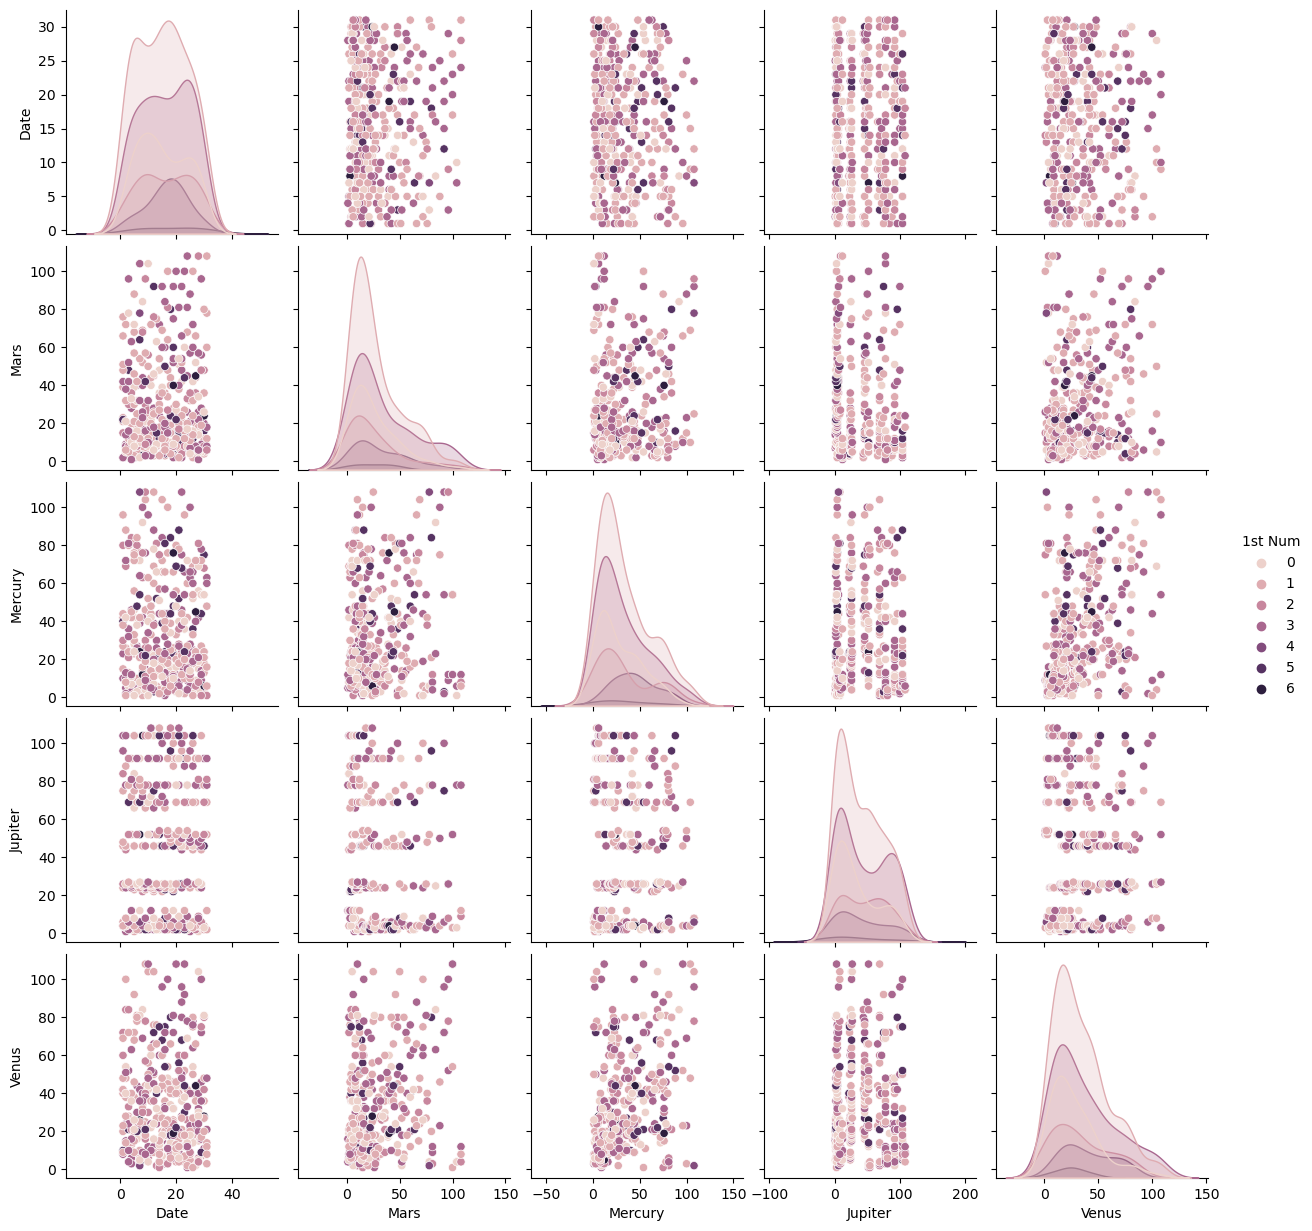

In [23]:
plt.figure(figsize=[5,5])
sns.pairplot(data=X, hue="1st Num")
plt.show()

In [29]:
X.corr()['1st Num']

Date       0.057686
Mars       0.083608
Mercury    0.100102
Jupiter    0.062639
Venus      0.089558
1st Num    1.000000
Name: 1st Num, dtype: float64

In [30]:
X.head()

,Date,Mars,Mercury,Jupiter,Venus,1st Num
0,1,2,80,84,72,2
1,5,2,42,84,19,0
2,8,3,63,22,38,2
3,12,3,22,22,76,1
4,15,4,66,22,20,1


In [41]:
X1 = X.iloc[:,0:5]
y = X.iloc[:,5:6]

In [45]:
X1.head()

,Date,Mars,Mercury,Jupiter,Venus
0,1,2,80,84,72
1,5,2,42,84,19
2,8,3,63,22,38
3,12,3,22,22,76
4,15,4,66,22,20


In [44]:
y.head()

,1st Num
0,2
1,0
2,2
3,1
4,1


In [46]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X1)
X_scaled = pd.DataFrame(X_scaled, columns=['Date','Mars','Mercury','Jupiter','Venus'])
X_scaled.head()

,Date,Mars,Mercury,Jupiter,Venus
0,-1.668858,-1.059961,1.725913,1.236511,1.475956
1,-1.213381,-1.059961,0.318906,1.236511,-0.586115
2,-0.871773,-1.021281,1.096462,-0.543361,0.153118
3,-0.416296,-1.021281,-0.421624,-0.543361,1.631584
4,-0.074688,-0.982601,1.207542,-0.543361,-0.547208


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=28)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279, 5), (279, 1), (93, 5), (93, 1))

In [59]:
model = Sequential()

model.add(Dense(100, activation='relu', input_dim = 5))
model.add(Dropout(0.1))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,401 (317.97 KB)

 Trainable params: 81,401 (317.97 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3859 - loss: 0.3137 - val_accuracy: 0.4821 - val_loss: -0.5685
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3541 - loss: -0.8914 - val_accuracy: 0.4821 - val_loss: -1.8763
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3515 - loss: -2.3182 - val_accuracy: 0.4821 - val_loss: -3.6336
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3968 - loss: -3.6887 - val_accuracy: 0.4821 - val_loss: -6.1491
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3619 - loss: -7.4805 - val_accuracy: 0.4821 - val_loss: -9.9950
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3400 - loss: -12.3410 - val_accuracy: 0.4821 - val_loss: -15.6674
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3833 - loss: -17.0102 - val_accuracy: 0.4821 - val_loss: -23.9220
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3666 - loss: -26.1586 - val_accuracy: 0

In [62]:
y_predict = model.predict(X_test, batch_size=64)
y_predict

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [63]:
model.evaluate(X_test,y_test,batch_size=64)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3088 - loss: -1703036.8750 


[-1732919.75, 0.32258063554763794]

In [64]:
model_lt = LogisticRegression()
model_lt.fit(X_train, y_train)

LogisticRegression()

In [67]:
model_lt.score(X_test, y_test)

0.3010752688172043

In [69]:
w, b = model_lt.coef_, model_lt.intercept_
w, b

(array([[-0.18474173, -0.2022882 , -0.41040432, -0.05604604, -0.01603764],
        [-0.14719428, -0.17162268, -0.21795478,  0.06934996,  0.09452792],
        [ 0.01782526, -0.18562482, -0.02761412,  0.19933092,  0.13925191],
        [ 0.07142353,  0.10778982, -0.39285389,  0.35430788,  0.24889854],
        [-0.33758315,  0.58669377,  0.93812624, -0.28648106, -0.80163554],
        [ 0.09999401, -0.00354487,  0.04191278,  0.3595194 ,  0.44020106],
        [ 0.48027636, -0.13140302,  0.06878809, -0.63998107, -0.10520625]]),
 array([ 1.07881846,  2.10150403,  0.78895321,  1.65984357, -4.23791011,
         0.22412597, -1.61533513]))

In [79]:
model_dt=DecisionTreeClassifier(criterion="entropy",max_depth=10, max_leaf_nodes=25)
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.3225806451612903

In [80]:
model_dt.get_depth(), model_dt.get_n_leaves()

(10, 25)

In [81]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights="distance", p=1)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [82]:
y_predict_knn = model_knn.predict(X_test)
y_predict_knn

array([1, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1,
       3, 1, 6, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 0, 3, 1, 1, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 3, 1, 1, 3, 5, 3, 1, 3,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 3, 1, 2, 3, 1,
       5, 3, 2, 3, 3])

In [85]:
y_test.values.T

array([[2, 2, 5, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 3, 3, 0, 5, 0, 3, 1, 0, 2,
        3, 5, 3, 1, 2, 1, 3, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 2, 0, 2, 0, 3,
        3, 1, 5, 5, 2, 2, 6, 1, 0, 1, 3, 3, 3, 1, 0, 1, 0, 0, 3, 3, 3, 1,
        1, 2, 0, 1, 3, 1, 3, 1, 1, 5, 3, 2, 3, 1, 1, 1, 3, 0, 1, 0, 3, 2,
        3, 3, 0, 1, 1]])

In [94]:
y_predict_knn.T == y_test.values.T

array([[False, False, False,  True, False,  True,  True, False,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False,  True, False, False,  True, False, False,  True, False,
        False,  True, False,  True, False,  True, False,  True, False,
        False,  True, False, False, False, False, False, False, False,
         True, False, False, False, False, False,  True, False,  True,
        False, False, False,  True, False,  True, False, False, False,
         True, False, False, False, False, False,  True, False,  True,
        False,  True,  True, False, False, False, False, False, False,
         True,  True, False,  True, False,  True, False, False,  True,
        False, False, False]])

In [83]:
accuracy_score(y_test, y_predict_knn)

0.3333333333333333